In [20]:

import sys
import os
from typing import List, Dict, Tuple, Any

eval_folder_paths = [   "exp/shadow_with_aug_selection_sasrec_on_sr_data_lr0.001_lstep20/ML-1M_MAB", ## ours
    "exp/shadow_sasrec_on_sr_data_lr0.001_lstep20/ML-1M_Full_Aug_RandSample",
    "exp/shadow_sasrec_on_sr_data_lr0.001_lstep20/ML-1M_random_pushing",
    "exp/shadow_sasrec_on_sr_data_lr0.001_lstep20/ML-1M_RightCutDefaultAug",
    "exp/shadow_sasrec_on_sr_data_lr0.001_lstep20/ML-1M_SelfSampledPush_10_20",
    "exp/shadow_sasrec_on_sr_data_lr0.001_lstep20/ML-1M_RandReplace1e-1",
    "exp/shadow_sasrec_on_sr_data_lr0.001_lstep20/ML-1M_RandReplace2e-1",
    "exp/shadow_sasrec_on_sr_data_lr0.001_lstep20/ML-1M_RandReplace3e-1",
    "exp/shadow_sasrec_on_sr_data_lr0.001_lstep20/ML-1M_RandReplace4e-1",
    "exp/shadow_sasrec_on_sr_data_lr0.001_lstep20/ML-1M_RandReplace5e-1",
    "exp/shadow_sasrec_on_sr_data_lr0.001_lstep20/ML-1M_shuffle"]
"""
[
    "exp/shadow_with_aug_selection_sasrec_on_sr_data_lr0.01_lstep20/sub_exp_20240921174108",
    "exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/AmazonSports_RightCutAugDefault_30K",
    "exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/AmazonSports_AllAugsRandSample"
]
"""

"""
[   "exp/shadow_with_aug_selection_sasrec_on_sr_data_lr0.001_lstep20/ML-1M_MAB", ## ours
    "exp/shadow_sasrec_on_sr_data_lr0.001_lstep20/ML-1M_Full_Aug_RandSample",
    "exp/shadow_sasrec_on_sr_data_lr0.001_lstep20/ML-1M_random_pushing",
    "exp/shadow_sasrec_on_sr_data_lr0.001_lstep20/ML-1M_RandReplace1e-1",
    "exp/shadow_sasrec_on_sr_data_lr0.001_lstep20/ML-1M_RightCutDefaultAug",
    "exp/shadow_sasrec_on_sr_data_lr0.001_lstep20/ML-1M_SelfSampledPush_10_20",
    "exp/shadow_sasrec_on_sr_data_lr0.001_lstep20/ML-1M_RandReplace5e-1",
    "exp/shadow_sasrec_on_sr_data_lr0.001_lstep20/ML-1M_shuffle"]
"""
"""
[
    "exp/shadow_with_aug_selection_sasrec_on_sr_data_lr0.01_lstep20/AmazonBeauty_MAB", ## ours
    "exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/AmazonBeauty_AllAugRandSample",
    "exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/AmazonBeauty_No_aug",
    "exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/AmazonBeauty_Shuffle",
    "exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/AmazonBeauty_RandPush_5_10",
    "exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/AmazonBeauty_SelfSampledpush",
    "exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/AmazonBeauty_RandReplace1e-1",
    "exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/AmazonBeauty_RandReplace2e-1",
    "exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/AmazonBeauty_RandReplace3e-1",
    "exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/AmazonBeauty_RandReplace4e-1",
    "exp/shadow_sasrec_on_sr_data_lr0.01_lstep20/AmazonBeauty_RandReplace5e-1",
]"""
    
    
config_paths = [os.path.join(eval_folder_path, "config.yaml") for eval_folder_path in eval_folder_paths]
evaluation_log_paths = [os.path.join(eval_folder_path, "eval_results.log") for eval_folder_path in eval_folder_paths]
print_log_paths = [os.path.join(eval_folder_path, "exp_print.log") for eval_folder_path in eval_folder_paths]

keys_for_each_run= [ folder_path.split("/")[-1] for folder_path in eval_folder_paths]
print(keys_for_each_run)


['ML-1M_MAB', 'ML-1M_Full_Aug_RandSample', 'ML-1M_random_pushing', 'ML-1M_RightCutDefaultAug', 'ML-1M_SelfSampledPush_10_20', 'ML-1M_RandReplace1e-1', 'ML-1M_RandReplace2e-1', 'ML-1M_RandReplace3e-1', 'ML-1M_RandReplace4e-1', 'ML-1M_RandReplace5e-1', 'ML-1M_shuffle']


In [21]:
def load_log_file(file_path : str) -> str:
    """
    Load the log file and return the content as string.
    """
    with open(file_path, 'r') as file:
        log_content = file.read()
    
    return log_content

In [22]:
## Parse eval_results.log for each experiment


def parse_and_save_via_round(line : str):
    # string in line like
    #{'Role': 'Server #', 'Round': 2000, 'Results_raw': {'val_avg_loss': 9.027567139082548, 'val_total': 22363, 'val_loss': 201883.48393130302, 'val_recall_10': 0.03264320269227028, 'val_recall_20': 0.048294056206941605, 'val_ndcg_10': 0.013208270072937012, 'val_ndcg_20': 0.017058826982975006, 'test_avg_loss': 9.184074541816972, 'test_total': 22363, 'test_loss': 205383.45897865295, 'test_recall_10': 0.024236461147665977, 'test_recall_20': 0.036667708307504654, 'test_ndcg_10': 0.009666664525866508, 'test_ndcg_20': 0.012766502797603607}}
    
    #convert_to_dict
    import ast
    line_dict = ast.literal_eval(line)
    #print(line_dict.keys())
    
    try :
        return {
            "round" : line_dict["Round"],
            "test_loss" : line_dict["Results_raw"]["test_loss"],
            "test_recall_10" : line_dict["Results_raw"]["test_recall_10"],
            "test_recall_20" : line_dict["Results_raw"]["test_recall_20"],
            "test_ndcg_10" : line_dict["Results_raw"]["test_ndcg_10"],
            "test_ndcg_20" : line_dict["Results_raw"]["test_ndcg_20"]
        }
    except :
        None

exp_results = {}

for exp_key, eval_log_path in zip(keys_for_each_run, evaluation_log_paths):
    print(f"Experiment {exp_key} - {eval_log_path}")
    log_content = load_log_file(eval_log_path)
    
    current_exp_results = {
        "round" : [],
        "test_loss" : [],
        "test_recall_10" : [],
        "test_recall_20" : [],
        "test_ndcg_10" : [],
        "test_ndcg_20" : []
    }
    for line in log_content.split("\n"):
        if "Results_raw" in line:
            current_round_results= parse_and_save_via_round(line)
            if current_round_results is not None:
                for key in current_round_results.keys():
                    current_exp_results[key].append(current_round_results[key])
    exp_results[exp_key] = current_exp_results

Experiment ML-1M_MAB - exp/shadow_with_aug_selection_sasrec_on_sr_data_lr0.001_lstep20/ML-1M_MAB/eval_results.log
Experiment ML-1M_Full_Aug_RandSample - exp/shadow_sasrec_on_sr_data_lr0.001_lstep20/ML-1M_Full_Aug_RandSample/eval_results.log
Experiment ML-1M_random_pushing - exp/shadow_sasrec_on_sr_data_lr0.001_lstep20/ML-1M_random_pushing/eval_results.log
Experiment ML-1M_RightCutDefaultAug - exp/shadow_sasrec_on_sr_data_lr0.001_lstep20/ML-1M_RightCutDefaultAug/eval_results.log
Experiment ML-1M_SelfSampledPush_10_20 - exp/shadow_sasrec_on_sr_data_lr0.001_lstep20/ML-1M_SelfSampledPush_10_20/eval_results.log
Experiment ML-1M_RandReplace1e-1 - exp/shadow_sasrec_on_sr_data_lr0.001_lstep20/ML-1M_RandReplace1e-1/eval_results.log
Experiment ML-1M_RandReplace2e-1 - exp/shadow_sasrec_on_sr_data_lr0.001_lstep20/ML-1M_RandReplace2e-1/eval_results.log
Experiment ML-1M_RandReplace3e-1 - exp/shadow_sasrec_on_sr_data_lr0.001_lstep20/ML-1M_RandReplace3e-1/eval_results.log
Experiment ML-1M_RandReplace4

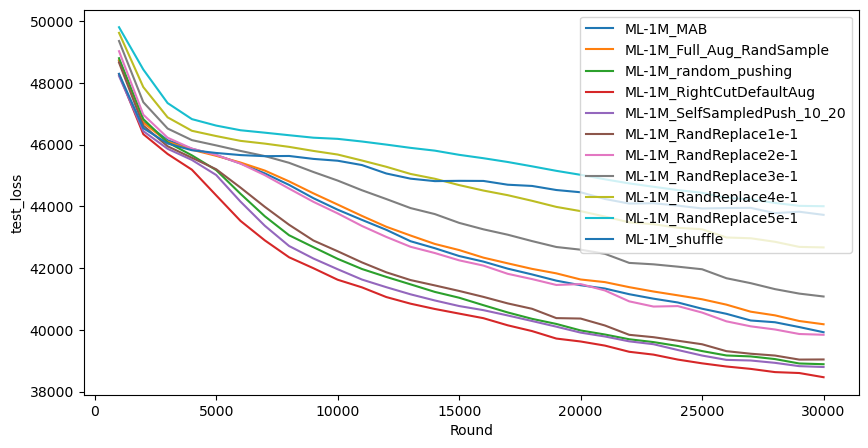

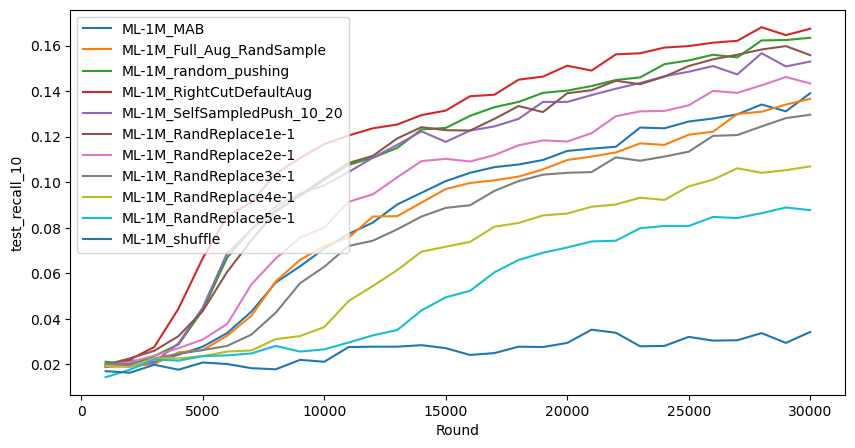

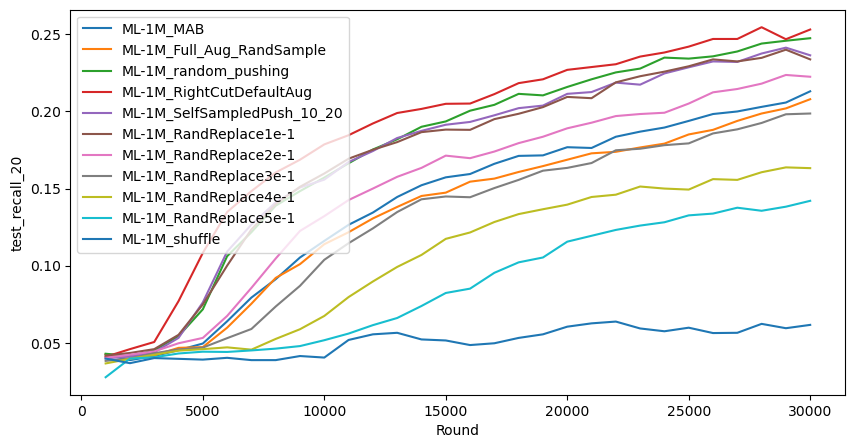

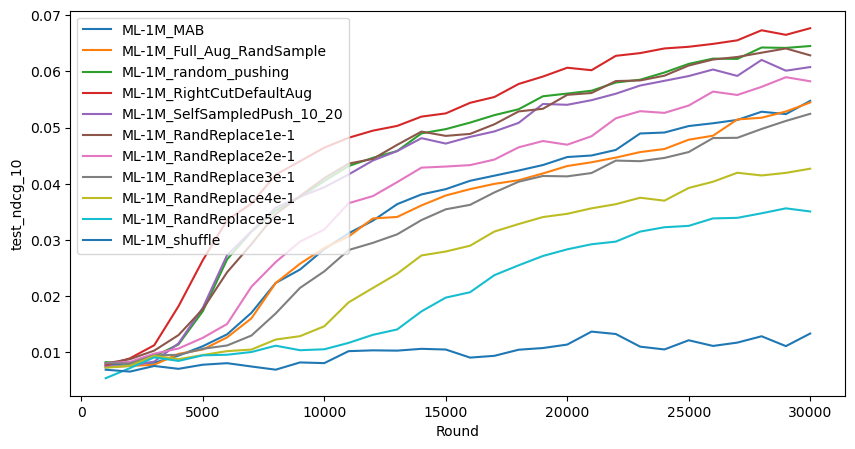

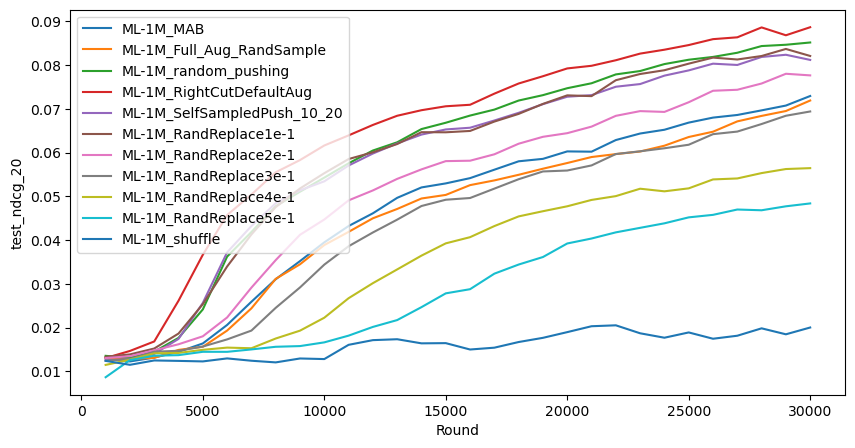

In [23]:
## Plot the results
import matplotlib.pyplot as plt
import numpy as np

def plot_results(exp_results : Dict[str, Dict[str, List[float]]], keys_for_each_run : List[str], metric : str, num : int = 0):
    plt.figure(figsize=(10, 5))
    for exp_key in keys_for_each_run:
        plt.plot(exp_results[exp_key]["round"][:num], exp_results[exp_key][metric][:num], label=exp_key)
    plt.xlabel("Round")
    plt.ylabel(metric)
    plt.legend()
    plt.show()
    
plot_results(exp_results, keys_for_each_run, "test_loss", 30)
plot_results(exp_results, keys_for_each_run, "test_recall_10", 30)
plot_results(exp_results, keys_for_each_run, "test_recall_20", 30)
plot_results(exp_results, keys_for_each_run, "test_ndcg_10", 30)
plot_results(exp_results, keys_for_each_run, "test_ndcg_20", 30)



In [24]:
## 8th result as a table
import pandas as pd

table_data = {
    "Exp" : [],
    "Recall@10" : [],
    "Recall@20" : [],
    "NDCG@10" : [],
    "NDCG@20" : []
}

n_th_round = 30

for exp_key in keys_for_each_run:
    table_data["Exp"].append(exp_key)
    ## round the result at 4th decimal
    table_data["Recall@10"].append( round(exp_results[exp_key]["test_recall_10"][n_th_round-1], 4))
    table_data["Recall@20"].append(round(exp_results[exp_key]["test_recall_20"][n_th_round-1], 4))
    table_data["NDCG@10"].append(round(exp_results[exp_key]["test_ndcg_10"][n_th_round-1], 4))
    table_data["NDCG@20"].append(round(exp_results[exp_key]["test_ndcg_20"][n_th_round-1], 4))

table_df = pd.DataFrame(table_data)
print(table_df)


                            Exp  Recall@10  Recall@20  NDCG@10  NDCG@20
0                     ML-1M_MAB     0.1391     0.2131   0.0548   0.0729
1     ML-1M_Full_Aug_RandSample     0.1366     0.2079   0.0545   0.0719
2          ML-1M_random_pushing     0.1634     0.2475   0.0645   0.0852
3      ML-1M_RightCutDefaultAug     0.1674     0.2531   0.0677   0.0887
4   ML-1M_SelfSampledPush_10_20     0.1530     0.2364   0.0608   0.0812
5         ML-1M_RandReplace1e-1     0.1558     0.2338   0.0629   0.0821
6         ML-1M_RandReplace2e-1     0.1434     0.2225   0.0582   0.0777
7         ML-1M_RandReplace3e-1     0.1296     0.1987   0.0525   0.0694
8         ML-1M_RandReplace4e-1     0.1070     0.1632   0.0427   0.0565
9         ML-1M_RandReplace5e-1     0.0877     0.1421   0.0351   0.0484
10                ML-1M_shuffle     0.0343     0.0616   0.0133   0.0200
